# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('/Users/allisoncannady/Documents/WHO_Data_Word.xlsx')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
# display first 10 rows
df.head()

,Country,Total Population Male,Total Population Female,Total Population Both,Life Expectancy Male,Life Expectancy Female,Life Expectancy Both,Healthy Life Expectancy Male,Healthy Life Expectancy Female,Healthy Life Expectancy Both,...,Hand Washing,Water Treated,Dev Expend Mil,Clean Fuel Tech,Pollution Urban,Homicide Mortality,Polio Cases,Hypertension 30-79,Obesity 5-19,Obesity Adults
0,Afghanistan,19976,18952,38928.0,63.3,63.2,63.2,54.7,53.2,53.9,...,38,-,140.29,33,63.6,8.5,1,40.2,3.1,5.5
1,Albania,1465,1413,2878.0,76.3,79.9,78,68,70.3,69.1,...,-,13,48.53,81,19.3,3.6,0,41.8,7.6,21.7
2,Algeria,22154,21697,43851.0,76.2,78.1,77.1,66.7,66.1,66.4,...,85,76,3.01,100,34.1,1.7,0,36.2,13.5,27.4
3,Andorra,-,-,77.0,-,-,-,-,-,-,...,-,100,-,100,9.5,-,-,31,12.8,25.6
4,Angola,16261,16605,32866.0,60.7,65.5,63.1,53.6,56.2,54.8,...,27,-,4.61,50,40.3,9.2,0,38.7,2.4,8.2


In [3]:
#look at number of rows and columns
df.shape

(204, 65)

In [4]:
#count number of rows
df.count()

Country                    202
Total Population Male      202
Total Population Female    201
Total Population Both      201
Life Expectancy Male       202
                          ... 
Homicide Mortality         202
Polio Cases                202
Hypertension 30-79         202
Obesity 5-19               202
Obesity Adults             202
Length: 65, dtype: int64

In [5]:
#get datatype etc info...why most object?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          202 non-null    object 
 1   Total Population Male            202 non-null    object 
 2   Total Population Female          201 non-null    object 
 3   Total Population Both            201 non-null    float64
 4   Life Expectancy Male             202 non-null    object 
 5   Life Expectancy Female           201 non-null    object 
 6   Life Expectancy Both             201 non-null    object 
 7   Healthy Life Expectancy Male     202 non-null    object 
 8   Healthy Life Expectancy Female   201 non-null    object 
 9   Healthy Life Expectancy Both     201 non-null    object 
 10  Maternal Mortality Ratio         202 non-null    object 
 11  Prop Births Skilled              201 non-null    object 
 12  Mortality Rate < 5    

In [6]:
#check null values... need to see what they are to change them to NaN then remove or change value to median
df.isnull().sum()

Country                    2
Total Population Male      2
Total Population Female    3
Total Population Both      3
Life Expectancy Male       2
                          ..
Homicide Mortality         2
Polio Cases                2
Hypertension 30-79         2
Obesity 5-19               2
Obesity Adults             2
Length: 65, dtype: int64

In [7]:
#identify non-standard values....they are "-"
df["Total Population Male"].unique()

array([19976, 1465, 22154, '-', 16261, 47, 22049, 1394, 12699, 4440, 5065,
       191, 1100, 83259, 139, 4399, 5744, 198, 6054, 410, 5858, 1607,
       1139, 104436, 227, 3374, 10445, 5900, 279, 8162, 13277, 18732,
       2394, 8200, 9426, 741999, 24985, 439, 2757, 2545, 13300, 1979,
       5623, 604, 5273, 12608, 44710, 2879, 519, 5418, 8824, 51703, 3036,
       780, 1778, 628, 570, 57517, 454, 2732, 31589, 1133, 1199, 1901,
       41416, 15750, 5116, 57, 8827, 6353, 963, 396, 5626, 4949, 4598,
       171, 717101, 137718, 42408, 20358, 2451, 4308, 29438, 1470, 61753,
       5166, 9113, 26719, 59, 2614, 3227, 3652, 869, 3436, 1057, 2543,
       3469, 1260, 317, 13815, 9434, 16631, 343, 10145, 221, 2335, 627,
       63071, 58, 1615, 311, 18317, 15188, 26220, 1232, 13348, 8537, 2370,
       3265, 12170, 104470, 1042, 2740, 3370, 113672, 2160, 4568, 3624,
       16379, 55029, 18338, 4824, 2165, 25666, 1932, 9354, 67640, 6367,
       90, 56, 103, 110, 20131, 8171, 4280, 50, 3981, 3062, 265

In [8]:
#get statistical info
df.describe()

,Total Population Both,Mortality Rate < 5,TB Incidence,HepB age < 5,NTD Reported,Univ Health Care,Density Nursing
count,2.010000e+02,202.000000,202.000000,202.000000,2.020000e+02,202.000000,202.000000
mean,1.157934e+05,36.688119,116.237624,10.862079,2.574691e+07,74.183168,57.635149
std,6.065729e+05,142.801559,192.541222,142.074780,1.531648e+08,138.359511,145.973875
min,2.000000e+00,2.000000,0.000000,0.000000,0.000000e+00,27.000000,1.100000
25%,2.083000e+03,6.000000,11.250000,0.120000,1.625000e+01,53.000000,14.650000
50%,9.538000e+03,16.000000,47.000000,0.270000,4.263750e+04,68.000000,35.750000
75%,3.286600e+04,42.000000,155.250000,0.925000,4.909612e+06,77.000000,65.125000
max,7.758157e+06,2020.000000,2020.000000,2020.000000,1.733624e+09,2019.000000,2020.000000


In [9]:
df.columns

Index(['Country', 'Total Population Male', 'Total Population Female',
       'Total Population Both', 'Life Expectancy Male',
       'Life Expectancy Female', 'Life Expectancy Both ',
       'Healthy Life Expectancy Male', 'Healthy Life Expectancy Female',
       'Healthy Life Expectancy Both ', 'Maternal Mortality Ratio',
       'Prop Births Skilled', 'Mortality Rate < 5', 'Neonatal Mortality Rate',
       'New HIV', 'TB Incidence ', 'Malaria Incidence', 'HepB age < 5',
       'NTD Reported', 'Prob Death CVD+ ', 'Suicide Rate',
       'Total Alcohol > 14', 'Road Mortality', 'Family Planning',
       'Ad Birth Rate 15-19', 'Ad Birth Rate 10-14', 'Univ Health Care',
       'Health care 10 > expend', 'Health care 25 > expend',
       'Air Pollut Mortality', 'WASH Mortality', 'Poison Mortality',
       'Tobacco Use < 15', 'DPT3 Immuno ', 'MCV2 immuno', 'PCV3 immuno',
       'HPV immuno', 'Research Health ', 'Medicine Affordable ',
       'Doctor Density', 'Density Nursing', 'Density Denti

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [11]:
#boxplot to show outliers
sns.boxplot(x=df["Obesity Adults"])
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

In [12]:
#Check data types...object?
df.dtypes


Country                     object
Total Population Male       object
Total Population Female     object
Total Population Both      float64
Life Expectancy Male        object
                            ...   
Homicide Mortality          object
Polio Cases                 object
Hypertension 30-79          object
Obesity 5-19                object
Obesity Adults              object
Length: 65, dtype: object

In [13]:
#change all objects to floats
for col in  df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

Country                     object
Total Population Male      float64
Total Population Female    float64
Total Population Both      float64
Life Expectancy Male       float64
                            ...   
Homicide Mortality         float64
Polio Cases                float64
Hypertension 30-79         float64
Obesity 5-19               float64
Obesity Adults             float64
Length: 65, dtype: object

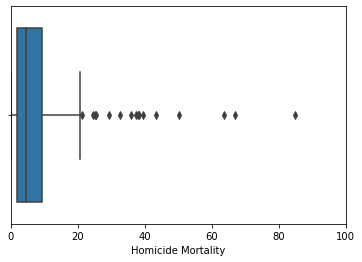

In [24]:
#boxplot to show outliers...wow, need to look into those countries
fig, ax = plt.subplots()
sns.boxplot(x=df["Homicide Mortality"])
ax.set_xlim(0, 100)
plt.show()

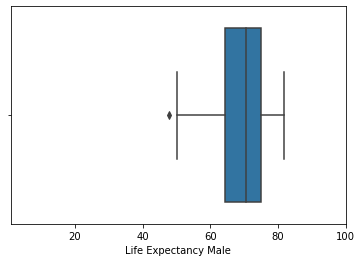

In [22]:
#boxplot to show outliers... need to check who the outlier is and if it makes sense 
fig, ax = plt.subplots()
sns.boxplot(x=df["Life Expectancy Male"])
ax.set_xlim(1, 100)
plt.show()

In [16]:
#checking to make sure values look correct for visuals
df.head()

,Country,Total Population Male,Total Population Female,Total Population Both,Life Expectancy Male,Life Expectancy Female,Life Expectancy Both,Healthy Life Expectancy Male,Healthy Life Expectancy Female,Healthy Life Expectancy Both,...,Hand Washing,Water Treated,Dev Expend Mil,Clean Fuel Tech,Pollution Urban,Homicide Mortality,Polio Cases,Hypertension 30-79,Obesity 5-19,Obesity Adults
0,Afghanistan,19976.0,18952.0,38928.0,63.3,63.2,63.2,54.7,53.2,53.9,...,38.0,NaN,140.29,33.0,63.6,8.5,1.0,40.2,3.1,5.5
1,Albania,1465.0,1413.0,2878.0,76.3,79.9,78.0,68.0,70.3,69.1,...,NaN,13.0,48.53,81.0,19.3,3.6,0.0,41.8,7.6,21.7
2,Algeria,22154.0,21697.0,43851.0,76.2,78.1,77.1,66.7,66.1,66.4,...,85.0,76.0,3.01,100.0,34.1,1.7,0.0,36.2,13.5,27.4
3,Andorra,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,100.0,9.5,NaN,NaN,31.0,12.8,25.6
4,Angola,16261.0,16605.0,32866.0,60.7,65.5,63.1,53.6,56.2,54.8,...,27.0,NaN,4.61,50.0,40.3,9.2,0.0,38.7,2.4,8.2


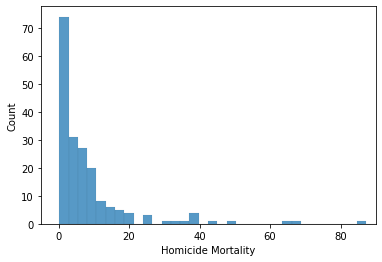

In [33]:
#histogram... to show more exact values and density of countries withing those numbers

fig, ax = plt.subplots()
sns.histplot(data=df, x="Homicide Mortality")
ax.set_xlim(-5, 90)
plt.show()

<AxesSubplot:xlabel='Country', ylabel='Life Expectancy Female'>

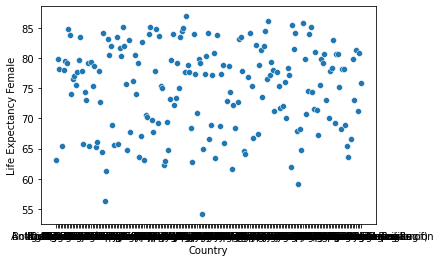

In [38]:
#scatterplot... interesting that theres no pattern
sns.scatterplot(data=df, x="Country",
                    y="Life Expectancy Female")

<AxesSubplot:xlabel='Country', ylabel='Life Expectancy Male'>

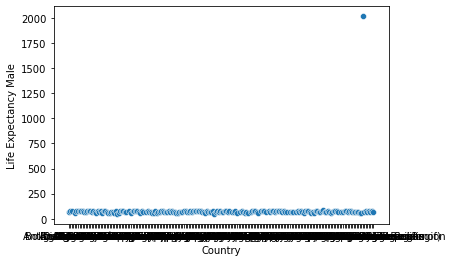

In [39]:
#need to look at that 2000+ value
sns.scatterplot(data=df, x="Country",
                    y="Life Expectancy Male")

(40.0, 90.0)

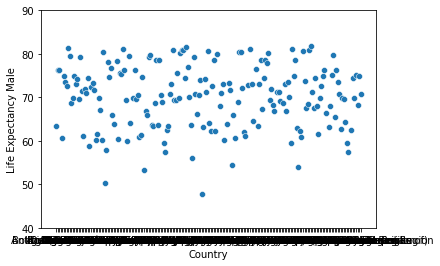

In [43]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Country",
                    y="Life Expectancy Male")
ax.set_ylim(40, 90)

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

In [ ]:
#1. Yes, there was a lot more missing data than I anticipated and everything was in the datatype "object" which made things difficult until I changed them to "float".

In [ ]:
#2. Yes. I am very concerned that I chose a dataset that will need a lot of cleaning and that might have unexpected errors that I dont know how to fix. 

In [ ]:
#3. I will need to remove the NaN values and decide what to do with them. I dont want to delete entire rows which are countries so I will probably have to change the values to a median for the column in order to graph and proceed. 